# Modelos No Supervisados

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree

from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

In [14]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [35]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k,init='k-means++').fit(X_train)
y_pred = kmeans.predict(X_test)

In [36]:
import pandas as pd

pd.crosstab(y_test,y_pred,rownames=['true values'],colnames=['cluster values'])

cluster values,0,1,2
true values,,,
0,16,0,0
1,0,0,18
2,0,7,4


In [25]:
from scipy.optimize import linear_sum_assignment

cost = -1.0*pd.crosstab(y_test,y_pred)
row_ind, col_ind = linear_sum_assignment(cost)

for i,j in enumerate(col_ind):
    print('Cluster Label : {0}, True Label : {1}'.format(i,j))

Cluster Label : 0, True Label : 1
Cluster Label : 1, True Label : 0
Cluster Label : 2, True Label : 2


In [20]:
print(col_ind)

[2 0 1]


In [38]:
from sklearn.metrics import davies_bouldin_score,silhouette_score

num_clusters=range(2,10)
ind_1=list()
ind_2=list()
for k in num_clusters:
    kmeans = KMeans(n_clusters=k,init='random').fit(X_train)
    labels = kmeans.labels_
    ind_1.append(davies_bouldin_score(X_train, labels))
    ind_2.append(silhouette_score(X_train, labels))
results=pd.DataFrame({'num_clusters':num_clusters,
                      'Davies-Bouldin':ind_1,
                      'Silhouette':ind_2})

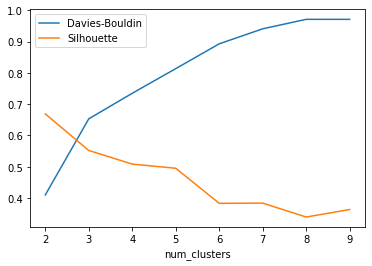

In [39]:
import matplotlib.pyplot as plt 

results.plot(x='num_clusters')
plt.show()

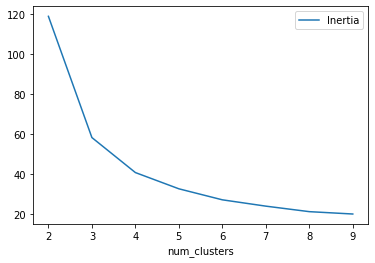

In [40]:
ind_3=list()
for k in num_clusters:
    kmeans = KMeans(n_clusters=k,init='random').fit(X_train)
    labels = kmeans.labels_
    ind_3.append(kmeans.inertia_)
results=pd.DataFrame({'num_clusters':num_clusters,
                     'Inertia':ind_3})
results.plot(x='num_clusters')
plt.show()

In [69]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3,covariance_type='full', n_init=10,random_state=0)
gm.fit(X_train)
y_pred=gm.predict(X_test)

In [70]:
pd.crosstab(y_test,y_pred,rownames=['true values'],colnames=['EM labels'])

EM labels,0,1,2
true values,,,
0,16,0,0
1,0,0,18
2,0,9,2


In [71]:
cost = -1.0*pd.crosstab(y_test,y_pred)
row_ind, col_ind = linear_sum_assignment(cost)
for i,j in enumerate(col_ind):
    print('Cluster Label : {0}, True Label : {1}'.format(i,j))

Cluster Label : 0, True Label : 0
Cluster Label : 1, True Label : 2
Cluster Label : 2, True Label : 1


In [72]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_train)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [73]:
import numpy as np

print("BGM active components: %d" % np.sum(bgm.weights_ > 0.01))

BGM active components: 3


# Tarea 

En este laboratorio Ud debe completar las siguientes tareas:


1.  Implementar un modelo base no supervisado para las tasas de movilidad de los paises.
2.  Reportar la metrica de ajuste del modelo base.
3.  Reportar la metrica de ajuste del modelo variando el numero de clusters.

In [74]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [75]:
import pandas as pd


def get_mobility_data(download=False):
    if download:
        data=pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=5a11e4fc1b8138c6')
        #data.to_csv('data/mobility_data.csv',index=False)
    else:
        data=pd.read_csv('data/mobility_data.csv', low_memory=False)
    return data

mobility_report=get_mobility_data(COLAB)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [76]:
mobility_report.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [77]:
mobility_report['date']=pd.to_datetime(mobility_report['date'],format='%Y/%m/%d')
mobility_report['country_region_code'] = mobility_report['country_region_code'].astype('category')
mobility_report['country_region'] = mobility_report['country_region'].astype('category')
mobility_report['iso_3166_2_code'] = mobility_report['iso_3166_2_code'].astype('category')
mobility_report.drop(['sub_region_1','sub_region_2','census_fips_code','iso_3166_2_code','metro_area'],axis=1,inplace=True)

In [78]:
mobility_report.dtypes

country_region_code                                         category
country_region                                              category
date                                                  datetime64[ns]
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
dtype: object

In [79]:
grouped_df=mobility_report.groupby(['country_region'])

In [81]:
df_country=grouped_df.median()

In [82]:
df_country.isna().sum()

retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    1
transit_stations_percent_change_from_baseline         1
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              3
dtype: int64

In [83]:
df_country.fillna(method='ffill',inplace=True)

In [84]:
df_country.isna().sum()

retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [85]:
df_country

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region,,,,,,
Afghanistan,-16.5,0.0,-6.0,-16.0,-18.0,8.0
Angola,-22.0,-9.0,-22.0,-46.0,-5.0,15.0
Antigua and Barbuda,-29.0,-18.5,-14.0,-51.0,-35.0,17.0
Argentina,-63.0,-17.0,-77.0,-60.0,-17.0,16.0
Aruba,-31.5,-8.0,-18.5,-48.0,-27.0,12.0
...,...,...,...,...,...,...
Venezuela,-45.0,-24.0,-41.0,-49.0,-31.5,16.0
Vietnam,-17.0,-6.0,-19.0,-15.0,3.0,5.0
Yemen,-4.0,2.0,-6.0,-5.5,-6.0,5.0


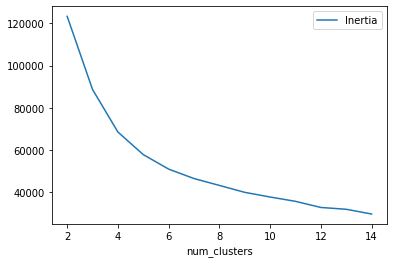

In [154]:
X=df_country.values
num_clusters=range(2,15)
ind_3=list()
for k in num_clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    ind_3.append(kmeans.inertia_)
results=pd.DataFrame({'num_clusters':num_clusters,
                     'Inertia':ind_3})
results.plot(x='num_clusters')
plt.show()

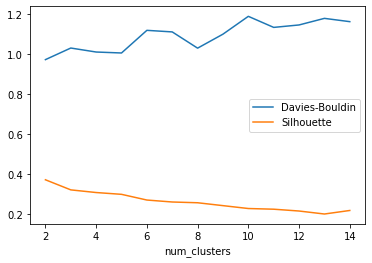

In [155]:
ind_1=list()
ind_2=list()
for k in num_clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    ind_1.append(davies_bouldin_score(X, labels))
    ind_2.append(silhouette_score(X, labels))
results=pd.DataFrame({'num_clusters':num_clusters,
                      'Davies-Bouldin':ind_1,
                      'Silhouette':ind_2})
results.plot(x='num_clusters')
plt.show()

In [162]:
bgm = BayesianGaussianMixture(n_components=30, n_init=10)
bgm.fit(X)
print("BGM active components: %d" % np.sum(bgm.weights_ > 0.01))

BGM active components: 20


In [169]:
bgm = BayesianGaussianMixture(n_components=20, n_init=500,max_iter=5000,
                              warm_start=False,verbose=0,weight_concentration_prior_type='dirichlet_distribution')
bgm.fit(X)
print("BGM active components: %d" % np.sum(bgm.weights_ > 0.01))

BGM active components: 11


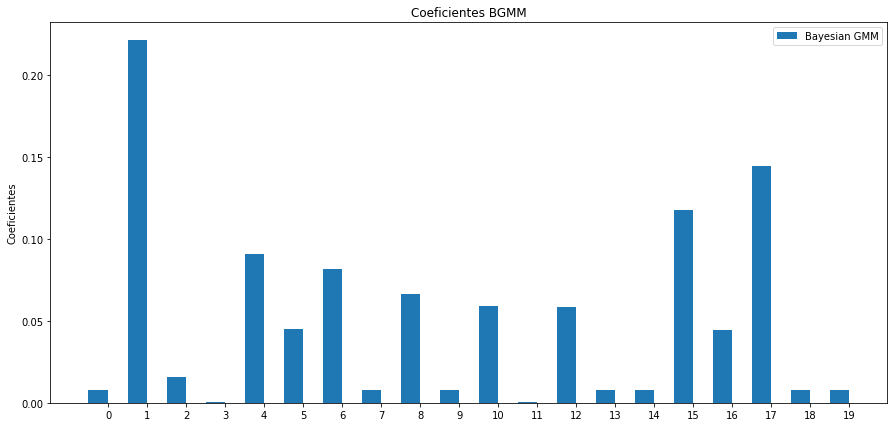

In [170]:
x = np.arange(len(bgm.weights_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, bgm.weights_, width, label='Bayesian GMM')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes BGMM')
ax.set_xticks(x)
ax.legend()

In [171]:
gmm = GaussianMixture(n_components=11, n_init=100,max_iter=1000)
gmm.fit(X)

y_pred=gmm.predict(X)

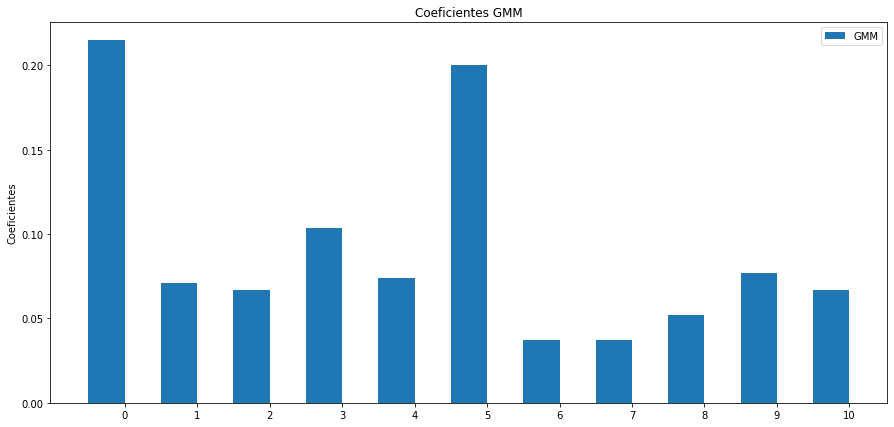

In [176]:
x = np.arange(len(gmm.weights_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, gmm.weights_, width, label='GMM')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes GMM')
ax.set_xticks(x)
ax.legend()

In [172]:
df_country['cluster_label']=y_pred

In [173]:
df_country['cluster_label'] = df_country['cluster_label'].astype('category')

0          AxesSubplot(0.1,0.736957;0.235294x0.163043)
1     AxesSubplot(0.382353,0.736957;0.235294x0.163043)
2     AxesSubplot(0.664706,0.736957;0.235294x0.163043)
3          AxesSubplot(0.1,0.541304;0.235294x0.163043)
4     AxesSubplot(0.382353,0.541304;0.235294x0.163043)
5     AxesSubplot(0.664706,0.541304;0.235294x0.163043)
6          AxesSubplot(0.1,0.345652;0.235294x0.163043)
7     AxesSubplot(0.382353,0.345652;0.235294x0.163043)
8     AxesSubplot(0.664706,0.345652;0.235294x0.163043)
9              AxesSubplot(0.1,0.15;0.235294x0.163043)
10        AxesSubplot(0.382353,0.15;0.235294x0.163043)
dtype: object

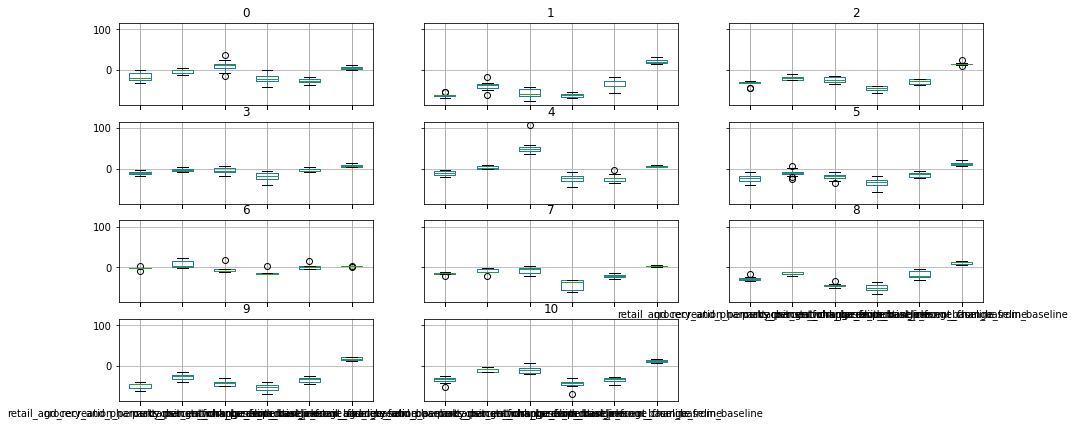

In [174]:
df_country.groupby('cluster_label').boxplot(figsize=(15,7),sharex=True, sharey=True)

In [175]:
df_country[df_country['cluster_label']==0]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cluster_label
country_region,,,,,,,
Afghanistan,-16.5,0.0,-6.0,-16.0,-18.0,8.0,0
Austria,-20.0,-7.0,13.0,-30.0,-28.0,5.0,0
Belarus,-7.0,3.5,26.0,-7.0,-18.0,0.0,0
Belgium,-27.0,-9.0,11.0,-34.0,-38.0,11.0,0
Bosnia and Herzegovina,-10.0,1.5,12.0,-14.0,-16.0,2.0,0
Bulgaria,-9.0,-3.0,7.0,-25.0,-18.0,2.0,0
Croatia,-5.0,-1.0,16.0,-31.0,-22.0,3.0,0
Czechia,-8.0,5.0,21.0,-13.0,-18.0,4.0,0
Estonia,-5.0,0.0,37.0,-8.0,-32.0,4.0,0


In [177]:
df_country[df_country['cluster_label']==1]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cluster_label
country_region,,,,,,,
Argentina,-63.0,-17.0,-77.0,-60.0,-17.0,16.0,1
Bolivia,-61.0,-49.0,-53.0,-68.0,-40.0,26.0,1
Chile,-53.0,-36.0,-58.0,-57.0,-27.0,20.0,1
Colombia,-54.0,-33.0,-47.0,-59.0,-29.0,19.0,1
Honduras,-61.0,-35.0,-42.0,-62.0,-39.0,18.0,1
Morocco,-64.0,-35.0,-61.0,-54.0,-41.0,21.0,1
Panama,-67.0,-40.0,-64.0,-64.0,-56.0,32.0,1
Peru,-68.0,-44.0,-47.0,-69.0,-39.0,26.0,1
Réunion,-62.0,-61.0,-70.5,-67.0,-28.0,16.0,1


In [178]:
df_country[df_country['cluster_label']==2]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cluster_label
country_region,,,,,,,
Antigua and Barbuda,-29.0,-18.5,-14.0,-51.0,-35.0,17.0,2
Bangladesh,-44.0,-24.0,-23.0,-40.0,-23.0,14.0,2
Barbados,-28.0,-19.0,-24.0,-56.0,-35.0,14.0,2
Haiti,-28.0,-24.0,-16.0,-43.0,-22.0,9.0,2
Jamaica,-32.0,-18.0,-29.0,-38.5,-28.0,14.0,2
Nepal,-44.5,-25.5,-29.0,-44.0,-34.0,13.0,2
Oman,-33.0,-24.0,-32.0,-47.0,-21.0,14.0,2
Singapore,-31.0,-9.0,-35.5,-39.0,-36.0,25.0,2
South Africa,-32.0,-14.0,-17.0,-49.0,-25.0,16.0,2


In [179]:
df_country[df_country['cluster_label']==3]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cluster_label
country_region,,,,,,,
Benin,-9.0,0.0,3.0,-16.5,-3.0,6.0,3
Botswana,-7.0,-2.0,-1.0,-21.0,-5.0,11.0,3
Cameroon,-12.0,-6.0,-15.5,-10.0,-3.0,7.0,3
Côte d'Ivoire,-8.0,0.0,-4.0,-16.0,0.0,8.0,3
Fiji,-13.5,-6.0,-8.5,-25.0,-9.0,10.0,3
Japan,-10.0,1.0,1.0,-24.0,-8.0,5.0,3
Laos,-10.5,-2.0,-7.0,-23.0,-1.0,4.0,3
Libya,-9.0,4.5,7.0,-39.0,-8.0,4.0,3
Mozambique,-13.0,-5.0,-15.0,-25.0,3.0,9.0,3


In [180]:
df_country[df_country['cluster_label']==4]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cluster_label
country_region,,,,,,,
Canada,-20.0,-1.0,48.0,-45.0,-34.0,10.0,4
Denmark,-3.0,-1.0,107.0,-21.0,-24.0,5.0,4
Finland,-9.0,2.0,48.0,-31.0,-35.0,4.0,4
Germany,-16.0,-2.0,47.5,-27.0,-23.0,6.0,4
Greece,-14.0,9.0,43.0,-17.0,-14.0,3.0,4
Lithuania,-20.0,6.0,48.5,-16.0,-24.0,3.0,4
Netherlands,-13.0,-2.0,59.0,-41.0,-31.0,8.0,4
Norway,-5.0,5.0,54.0,-23.0,-28.0,5.0,4
South Korea,-9.0,6.0,40.0,-8.0,-4.0,4.0,4


In [181]:
df_country[df_country['cluster_label']==5]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cluster_label
country_region,,,,,,,
Angola,-22.0,-9.0,-22.0,-46.0,-5.0,15.0,5
Australia,-15.0,1.0,-18.0,-33.0,-13.0,9.0,5
Bahrain,-30.0,-11.0,-29.5,-28.0,-20.0,15.0,5
Brazil,-37.0,-1.0,-36.0,-41.0,-10.0,12.0,5
Cambodia,-16.0,-12.0,-11.0,-38.0,-15.0,9.0,5
Egypt,-39.0,6.0,-23.0,-34.0,-17.0,10.0,5
Gabon,-24.0,-13.0,-14.0,-32.0,-13.0,17.0,5
Ghana,-16.0,-7.0,-18.0,-19.0,-14.0,13.0,5
Guinea-Bissau,-22.0,-11.0,-15.0,-57.0,-15.0,17.0,5


In [182]:
df_country[df_country['cluster_label']==6]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cluster_label
country_region,,,,,,,
Burkina Faso,-2.0,-1.0,-8.0,-16.0,0.0,3.0,6
Mongolia,-1.0,24.0,19.0,3.0,-4.0,0.0,6
Niger,-1.0,1.0,-12.0,-14.0,-4.0,2.0,6
Papua New Guinea,3.0,16.5,-10.0,-17.0,16.0,2.0,6
Taiwan,-8.0,4.0,-3.0,-15.5,3.0,2.0,6
